<a href="https://colab.research.google.com/github/wileyloyd/wileyloyd.github.io/blob/main/Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotnine as p9
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from numpy.linalg import eig

In [4]:
medical = pd.read_csv('/content/drive/MyDrive/OneDrive-Personal/wgu/D212 - Data Mining II/Task 2/medical_clean.csv')
pd.set_option('display.max_columns', None)

<Axes: >

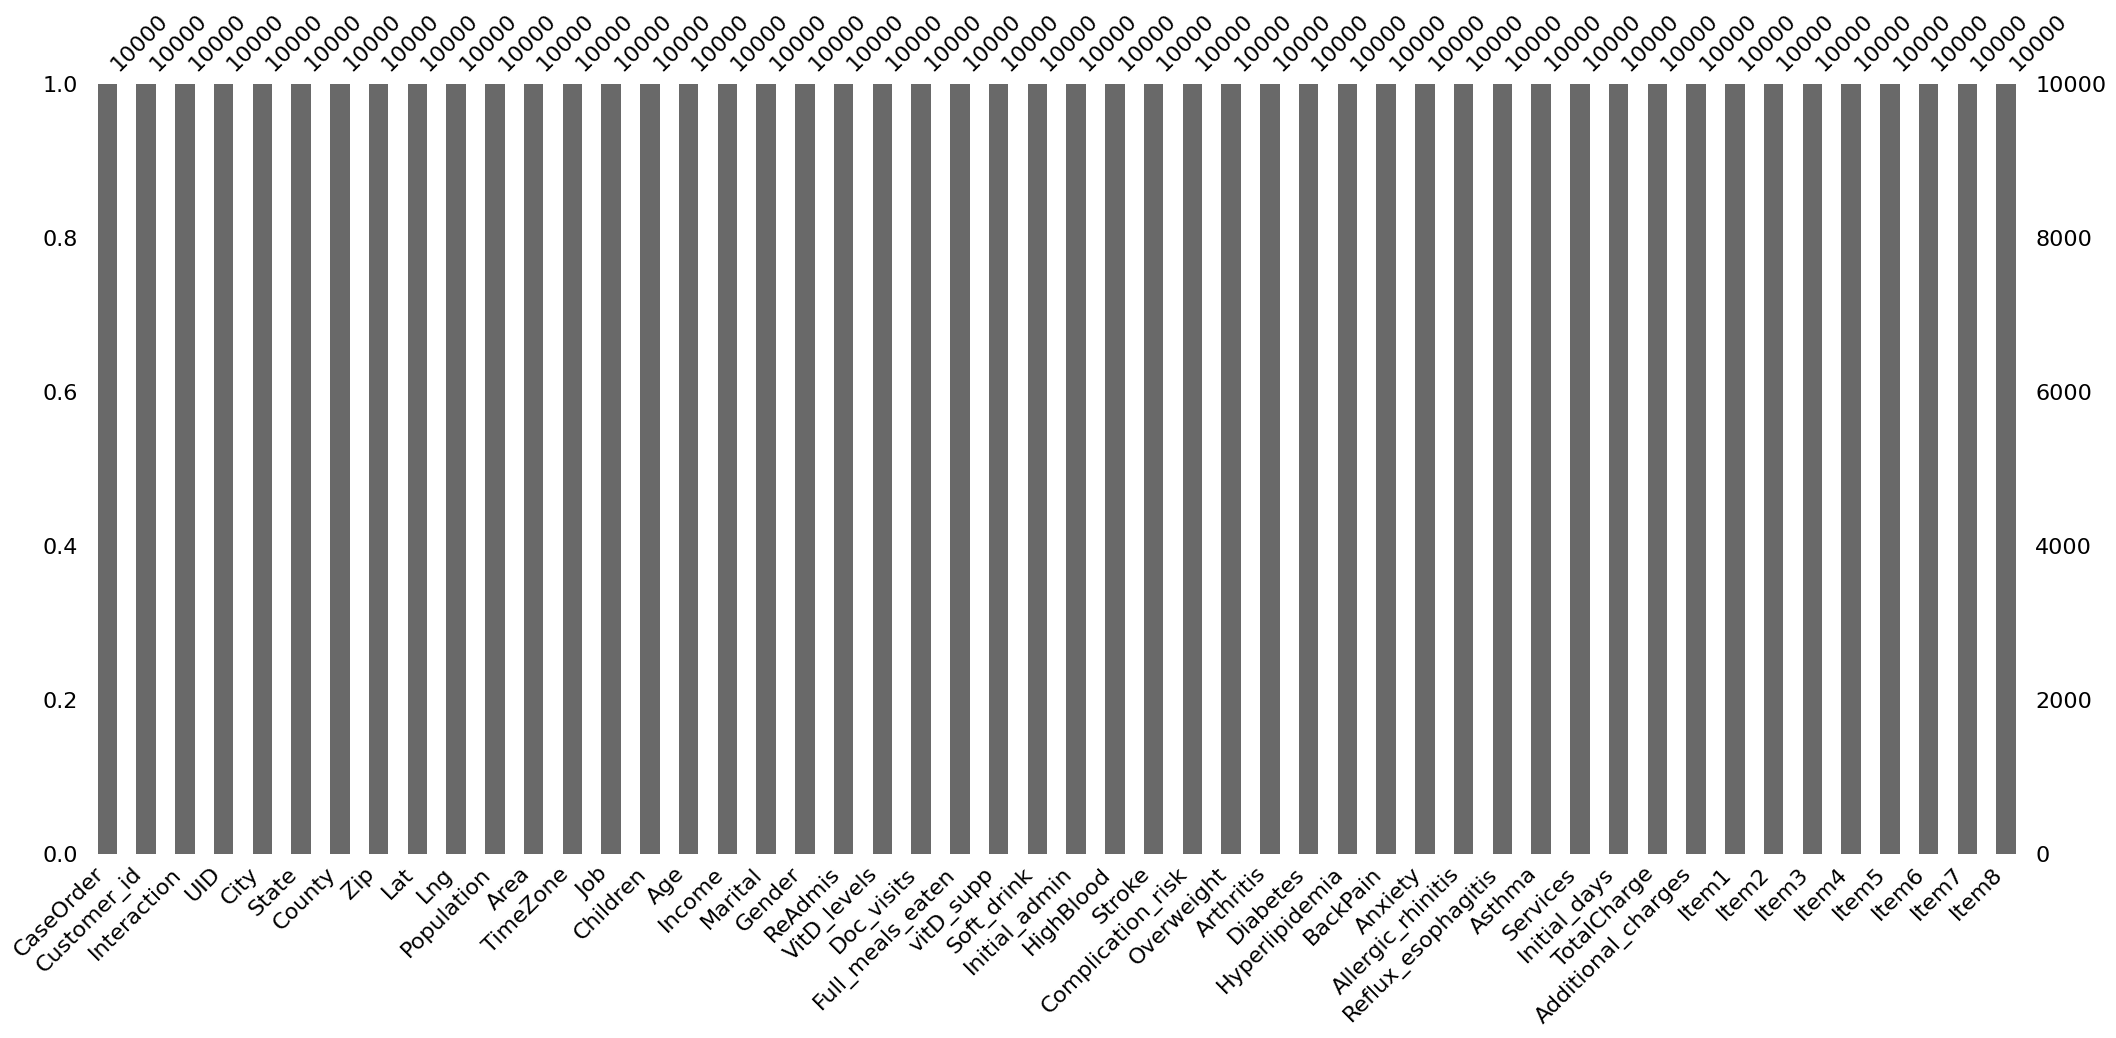

In [5]:
msno.bar(medical)

In [6]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [7]:
medical_int = medical.select_dtypes(include=['int64', 'float64'])
drop = ['CaseOrder', 'Zip', 'Lat', 'Lng']
medical_int = medical_int.drop(drop, axis=1)
mask = (medical_int > 10).any()
medical_int = medical_int.loc[:, mask]

In [8]:
medical_int.corr()

,Population,Age,Income,VitD_levels,Initial_days,TotalCharge,Additional_charges
Population,1.000000,-0.018987,0.005426,0.002651,0.017469,0.019188,-0.004820
Age,-0.018987,1.000000,-0.012228,0.010315,0.016264,0.016876,0.716854
Income,0.005426,-0.012228,1.000000,-0.013115,-0.012465,-0.014345,-0.009825
VitD_levels,0.002651,0.010315,-0.013115,1.000000,-0.003642,-0.001403,0.008290
Initial_days,0.017469,0.016264,-0.012465,-0.003642,1.000000,0.987640,0.004409
TotalCharge,0.019188,0.016876,-0.014345,-0.001403,0.987640,1.000000,0.029256
Additional_charges,-0.004820,0.716854,-0.009825,0.008290,0.004409,0.029256,1.000000


In [9]:
scaler = StandardScaler()

medical_scaled = scaler.fit_transform(medical_int)

In [10]:
pca = PCA()

pc = pca.fit_transform(medical_scaled)

pc_names = []
pc_range = range(0, medical_int.shape[1], 1)
for name in pc_range:
    pc_names.append('PC' + str(name))

medical_pc = pd.DataFrame(pc, columns=pc_names)

pca_loadings = pd.DataFrame(pca.components_, columns=pc_names, index=medical_int.columns)
print(pca_loadings)

pca_loadings.to_csv(r'/content/drive/MyDrive/OneDrive-Personal/wgu/D212 - Data Mining II/Task 2/full_pca_loadings.csv', index=True)

                         PC0       PC1       PC2       PC3       PC4  \
Population          0.023764  0.084541 -0.020681 -0.001640  0.701091   
Age                -0.027794  0.701622 -0.019072  0.019142 -0.089764   
Income              0.139508  0.018925  0.717051 -0.682130  0.005694   
VitD_levels         0.913250  0.004898  0.171784  0.368144 -0.015491   
Initial_days       -0.380757 -0.001245  0.674929  0.631501  0.018090   
TotalCharge         0.014048  0.706758  0.002157 -0.001922  0.031477   
Additional_charges -0.000910  0.026259  0.001291 -0.001545 -0.706274   

                         PC5       PC6  
Population          0.702221  0.084934  
Age                -0.079253  0.701346  
Income              0.003713  0.025860  
VitD_levels        -0.012829  0.022484  
Initial_days        0.017349 -0.008450  
TotalCharge        -0.031550 -0.705905  
Additional_charges  0.706491 -0.036789  


In [11]:
# Accessing the variance of each principal component
variance = pca.explained_variance_

# Calculating the proportion of variance explained by each principal component
variance_ratio = pca.explained_variance_ratio_

# Printing the variance and variance ratio of each principal component
for i in range(len(variance)):
    print("Principal Component", i, "Variance:", variance[i])
    print("Principal Component", i, "Variance Ratio:", variance_ratio[i])

Principal Component 0 Variance: 1.9928953054024305
Principal Component 0 Variance Ratio: 0.28467085941027004
Principal Component 1 Variance: 1.7141216635811038
Principal Component 1 Variance Ratio: 0.24485003591639226
Principal Component 2 Variance: 1.0127829989418922
Principal Component 2 Variance Ratio: 0.14466881723457115
Principal Component 3 Variance: 1.0014032968969155
Principal Component 3 Variance Ratio: 0.14304330808103227
Principal Component 4 Variance: 0.9842087378594608
Principal Component 4 Variance Ratio: 0.1405871881408107
Principal Component 5 Variance: 0.28356809295993696
Principal Component 5 Variance Ratio: 0.04050567659294871
Principal Component 6 Variance: 0.011719974365259312
Principal Component 6 Variance Ratio: 0.0016741146239746838


##### Standardized Features

In [12]:
standardized_features = pd.DataFrame(medical_scaled, columns=medical_int.columns)
standardized_features.to_csv(r'/content/drive/MyDrive/OneDrive-Personal/wgu/D212 - Data Mining II/Task 2/standardized_features.csv', index=False)

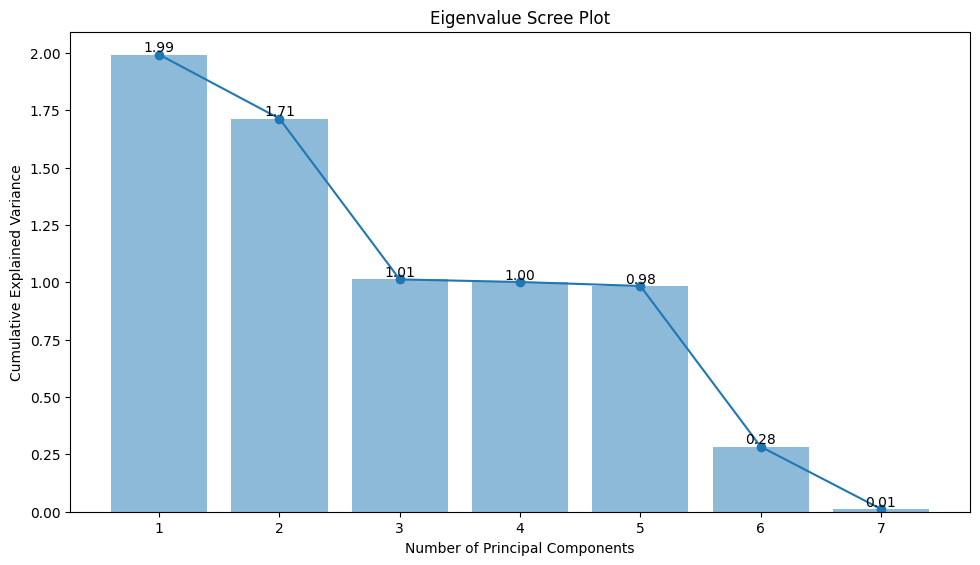

In [13]:
covariance_matrix = np.cov(medical_pc.T)

eigenvalues = pca.explained_variance_
sorted_eigenvalues = np.sort(eigenvalues)[::-1]

explained_variance_ratio = np.cumsum(sorted_eigenvalues) / np.sum(sorted_eigenvalues)

# Customize figure size and spacing
plt.figure(figsize=(10, 6))  # Adjust the width and height of the figure
plt.subplots_adjust(left=0.1, right=1, bottom=0.1, top=0.9)  # Adjust the margins

# Create the scree plot
plt.plot(range(1, len(sorted_eigenvalues) + 1), sorted_eigenvalues, marker='o', )
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Eigenvalue Scree Plot')

# Add data labels
for i, eigenvalue in enumerate(sorted_eigenvalues):
    plt.text(i+1, eigenvalue, f'{eigenvalue:.2f}', va='bottom', ha='center')

# Create the bar chart
plt.bar(range(1, len(sorted_eigenvalues) + 1), sorted_eigenvalues, alpha=0.5, label='Eigenvalues')


# Set x-axis tick locations and labels as whole numbers
plt.xticks(range(1, len(sorted_eigenvalues) + 1))


plt.show()

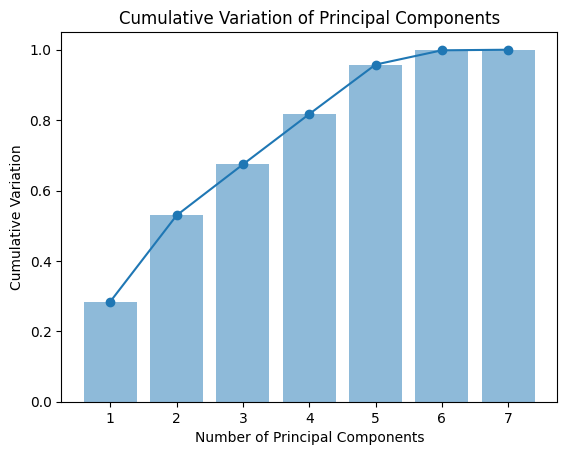

In [14]:
# Calculate cumulative sum of explained variances
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative variation
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.bar(range(1, len(cumulative_variance) +1), cumulative_variance, alpha=.5)
# Set x-axis tick locations and labels as whole numbers
plt.xticks(range(1, len(sorted_eigenvalues) + 1))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variation')
plt.title('Cumulative Variation of Principal Components')
plt.show()

In [15]:
# Printing the variance and variance ratio of each principal component
for i in range(len(cumulative_variance)):
    print("Principal Component", i, " Cumulative Variance:", cumulative_variance[i])

Principal Component 0  Cumulative Variance: 0.28467085941027004
Principal Component 1  Cumulative Variance: 0.5295208953266624
Principal Component 2  Cumulative Variance: 0.6741897125612335
Principal Component 3  Cumulative Variance: 0.8172330206422658
Principal Component 4  Cumulative Variance: 0.9578202087830765
Principal Component 5  Cumulative Variance: 0.9983258853760252
Principal Component 6  Cumulative Variance: 0.9999999999999999


In [16]:
eigenvalues_greater_than_1 = [eigenvalue for eigenvalue in sorted_eigenvalues if np.round(eigenvalue, 2) > 1]

components_to_keep = len(eigenvalues_greater_than_1)

# Principal Components Kept

In [17]:
pca = PCA(n_components=components_to_keep)

pc = pca.fit_transform(medical_scaled)

pc_names = ['PC' + str(i) for i in range(components_to_keep)]

medical_pc = pd.DataFrame(pc, columns=pc_names)

pca_loadings = pd.DataFrame(pca.components_.T, columns=pc_names, index=medical_int.columns)
print(pca_loadings)

                         PC0       PC1       PC2
Population          0.023764 -0.027794  0.139508
Age                 0.084541  0.701622  0.018925
Income             -0.020681 -0.019072  0.717051
VitD_levels        -0.001640  0.019142 -0.682130
Initial_days        0.701091 -0.089764  0.005694
TotalCharge         0.702221 -0.079253  0.003713
Additional_charges  0.084934  0.701346  0.025860


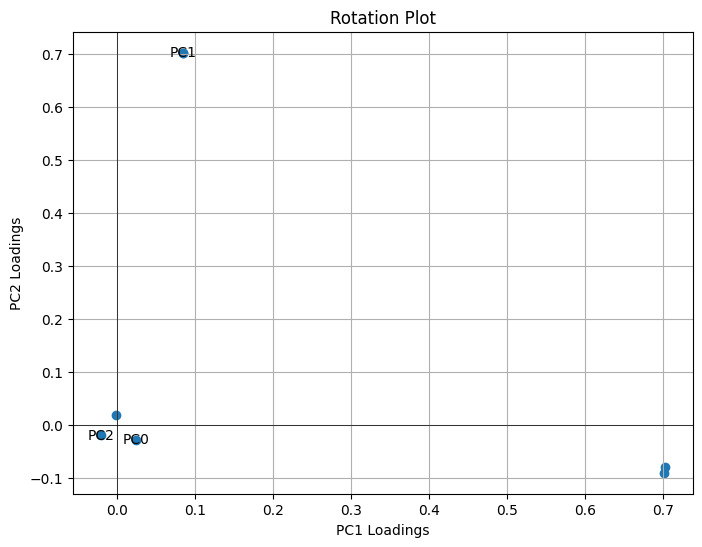

In [18]:
# Create the rotation plot
plt.figure(figsize=(8, 6))
plt.scatter(pca.components_[0, :], pca.components_[1, :])
plt.xlabel('PC1 Loadings')
plt.ylabel('PC2 Loadings')
plt.title('Rotation Plot')

# Iterate over the range of components_to_keep
for i in range(components_to_keep):
    plt.text(pca.components_[0, i], pca.components_[1, i], pc_names[i], va='center', ha='center')


plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()
